# HW5
2014-19586 정현재

In [1]:
import PIL.Image as img
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
plt.style.use('default')

1. 영상을압축하는SVD compression코드를작성하여라. ”truck.jpg” data를사용하여k= 2, 10, 20, 80일때그림을표시하여라.

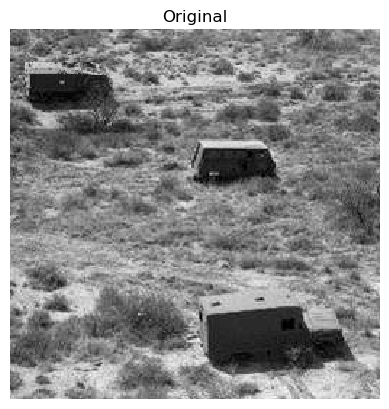

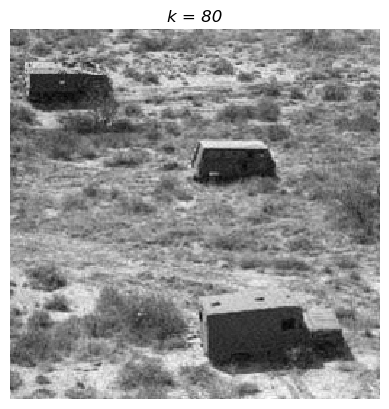

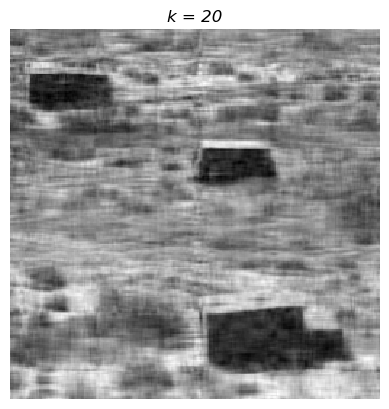

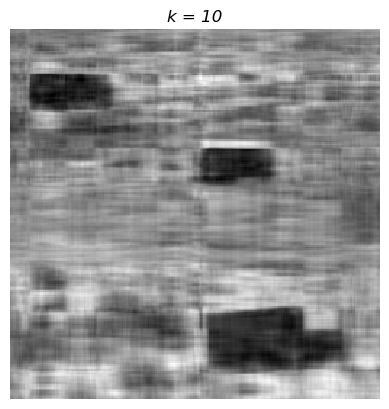

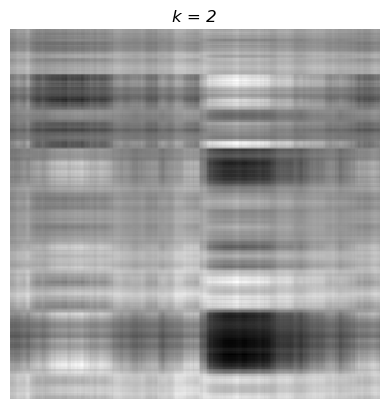

In [2]:
def problem1(k_list = [80,20,10,2]):
    pix = cv2.imread('HW5/truck.jpg', cv2.IMREAD_GRAYSCALE)
    fig = plt.figure()
    plt.imshow(pix, cmap ='gray')
    plt.title('Original')
    plt.axis('off')
    plt.show()

    for k in k_list:
        SVDcomp(pix,k, plot = True)
        
    return

def SVDcomp(pix, k, plot = False):
    U, E, V = np.linalg.svd(pix)
    U = U[:,:k]
    E = E[:k]
    V = V[:k,:]
    if plot == True:
        fig = plt.figure()
        plt.imshow(U.dot(np.diag(E).dot(V)), cmap = 'gray')
        plt.title('k = %d'%k,style = 'oblique')
        plt.axis('off')
        plt.show()

    return U, E, V

problem1()


2. Eigenface를구하는코드를작성하여라.주어진data(facedata)에대하여k= 20으로근사한후,본인의얼굴과 가장가까운얼굴이미지를찾아내어라

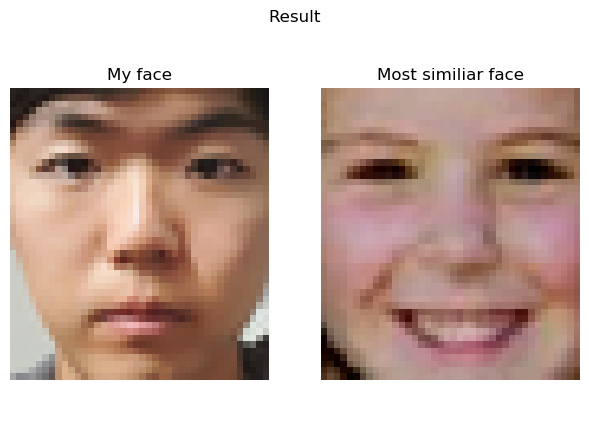

In [3]:
def problem2(target = 'HW5/myface.png', show_eigenface = False):
    
    # face set 만들기
    face_set = np.empty((1800,20))

    for i in range(1,21):
        face = cv2.imread('HW5/face_data/%d.png'%i,cv2.IMREAD_GRAYSCALE)

        U,E,V = SVDcomp(face,20)
        face = U.dot(np.diag(E).dot(V))
        face = face.reshape(1800)
        face_set[:,i-1] = face

    # face_space 만들기
    avgface = face_set.mean(1)

    face_set += - avgface.reshape((1800,1))
    A = face_set

    w, v = np.linalg.eigh(A.T.dot(A))   #AtA의 eigen-value, eigen-vector 구하기
    w = w[::-1]
    v = v[:,::-1]

    u = A.dot(v)
    u = u/np.linalg.norm(u,axis = 0)    #AAt의 eigen-value, eigen-vector 구하기
    
    k = np.argmax(w.cumsum()/w.sum() > 0.95) + 1 ## PCA, eigen-value들을 큰 것 부터 합하여 95% 이상의 비율이 되도록 선택
    w = w[:k]
    u = u[:,:k]

    if show_eigenface:
        for i in range(len(u[0,:])):
            plt.figure(facecolor = 'w', edgecolor = 'w')
            plt.imshow(u[:,i].reshape((45,40)),cmap='gray')
            plt.title('%dth eigenface'%(i+1), color = 'k')
            plt.axis('off')
            plt.show()
        print('20번째는 noise에 가까움')

    # face data들의 eigenspace에서의 좌표값 구하기
    omega_set = u.T.dot(face_set)

    # Myface의 eigenface에서 좌표값 구하기

    myface = cv2.imread(target, cv2.IMREAD_GRAYSCALE)
    myface = myface.reshape(1800)
    myface = myface - avgface
    omega = u.T.dot(myface)

    # 가장 가까운 얼굴 찾기
    norm = np.linalg.norm(omega_set - omega.reshape([k,1]), axis = 0)
    close_face = norm.argmin()+1

    plt.figure()
    plt.title('Result')
    plt.tight_layout(True)
    plt.axis('off')

    myface = cv2.imread(target)
    myface = cv2.cvtColor(myface, cv2.COLOR_BGR2RGB)
    plt.gcf().add_subplot(1,2,1)
    plt.imshow(myface)
    plt.title('My face')
    plt.axis('off')

    simface = cv2.imread('HW5/face_data/%d.png'%close_face)
    simface = cv2.cvtColor(simface, cv2.COLOR_BGR2RGB)
    plt.gcf().add_subplot(1,2,2)
    plt.imshow(simface)
    plt.title('Most similiar face')
    plt.axis('off')

    plt.show()

    return

problem2()